In [2]:
# Linking drive to the current collab file
from google.colab import drive
drive. mount('/content/drive')

Mounted at /content/drive


In [4]:
# # Installing the 'patool' package to extract files
pip install patool

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.3/86.3 kB 2.3 MB/s eta 0:00:00


In [23]:
# Importing the library to read the zip files
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/cats_vs_dogs_small.zip","r") as dataset_zip:
    dataset_zip.extractall("/content") #Extracting the required files to specific directory

In [25]:
# Importing the OS module to manage file paths
import os
dataset_directory = "/content/cats_vs_dogs_small"
print( "Contents of the base directory:", os.listdir(dataset_directory))

Contents of the base directory: ['test', 'validation', 'train']


In [28]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 72.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 99.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 101.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.6 MB/s eta 0:00:00


In [29]:
import os
import pathlib # To change file system paths
import numpy as np  # Importing numpy library
import matplotlib.pyplot as plotlib # Importing library for visualizations
import tensorflow as tf  # Importing the TensorFlow library
from tensorflow import keras # Importing necessary modules from Keras and TensorFlow libraries
from tensorflow.keras import layers, models, applications # Importing layers, models, and pre-trained applications from tensorflow and keras

# Setting the correct path to your dataset for Training, Validation and Testing
path_train = '/content/cats_vs_dogs_small/train'
path_val = '/content/cats_vs_dogs_small/validation'
path_test = '/content/cats_vs_dogs_small/test'

In [30]:
# Loading dataset images from training to Tesnor flow dataset
data_train = keras.preprocessing.image_dataset_from_directory(
    path_train,
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.


In [8]:
# Loading Validation Images
data_val = keras.preprocessing.image_dataset_from_directory(
    path_val,
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.


In [9]:
# Loading Testing images
data_test = keras.preprocessing.image_dataset_from_directory(
    path_test,
    image_size=(180, 180),
    batch_size=32)

Found 1000 files belonging to 2 classes.


In [31]:
 # Displaying top 9 images in a grid format from the dataset
def show_images(dataset):
    plotlib.figure(figsize=(10, 10)) #mentioning the size of image required
    for images, classifier_model_image_labels in dataset.take(1):
        for i in range(9):
            ax = plotlib.subplot(3, 3, i + 1)
            plotlib.imshow(images[i].numpy().astype("uint8")) #Displays images
            plotlib.title("Cat" if classifier_model_image_labels[i] == 0 else "Dog")
            plotlib.axis("off")
    plotlib.show()

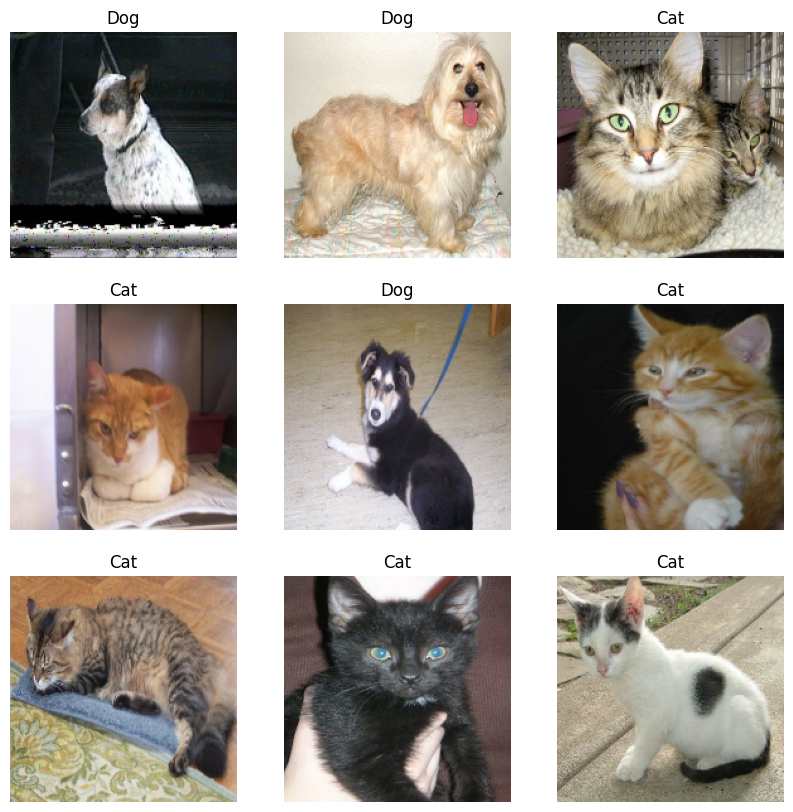

In [32]:
# Calling the function top 9 random display images
show_images(data_train)

In [13]:
def build_custom_classifier_model():
     #Function to build the CNN model
    cnn_classifier_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    cnn_classifier_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return cnn_classifier_model

In [14]:
# Data augmentation and preprocessing with sample size parameters
def prepare_data_flows(path_train, path_val, batch_size, num_samples=None):
    train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )
    val_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

    gen_train = train_datagen.flow_from_directory(
        path_train,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='binary'
    )
    val_generator = val_datagen.flow_from_directory(
        path_val,
        target_size=(180, 180),
        batch_size=batch_size,
        class_mode='binary'
    )
    return gen_train, val_generator

In [15]:
# Training the cnn_classifier_model
def fit_classifier_model(cnn_classifier_model, gen_train, gen_val, epochs=30): # Change: Rename 'num_epochs' to 'epochs'
    training_log = cnn_classifier_model.fit(gen_train,
                        validation_data=gen_val,
                                epochs=epochs)  # Change: Use 'epochs' instead of 'num_epochs'
    return training_log

In [16]:
# Step 1: Training the cnn_classifier_model from scratch with 1000 samples
train_generator_1, validation_generator_1 = prepare_data_flows(path_train, path_val, batch_size=32, num_samples=1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
classifier_model_A = build_custom_classifier_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
training_log_A = fit_classifier_model(classifier_model_A, train_generator_1, validation_generator_1)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 26s 378ms/step - accuracy: 0.4900 - loss: 1.2645 - val_accuracy: 0.5470 - val_loss: 0.6891
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 373ms/step - accuracy: 0.5686 - loss: 0.6838 - val_accuracy: 0.6050 - val_loss: 0.6622
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 370ms/step - accuracy: 0.5750 - loss: 0.6725 - val_accuracy: 0.5870 - val_loss: 0.6601
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 368ms/step - accuracy: 0.6191 - loss: 0.6490 - val_accuracy: 0.6270 - val_loss: 0.6637
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - accuracy: 0.5930 - loss: 0.6624 - val_accuracy: 0.5980 - val_loss: 0.6556
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 372ms/step - accuracy: 0.6178 - loss: 0.6577 - val_accuracy: 0.6330 - val_loss: 0.6418
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 370ms/step - accuracy: 0.6131 - loss: 0.6531 - val_accuracy: 0.6110 - val_loss: 0.6422
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 375ms/step - accuracy: 0.6364 - loss: 0.6321 - val_accu

In [19]:
# Step 2: Increasing training samples to 1500
train_generator_2, validation_generator_2 = prepare_data_flows(path_train, path_val, batch_size=32, num_samples=1500)
classifier_model_B = build_custom_classifier_model()
training_log_B = fit_classifier_model(classifier_model_B, train_generator_2, validation_generator_2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 367ms/step - accuracy: 0.5019 - loss: 1.2752 - val_accuracy: 0.5400 - val_loss: 0.6916
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 363ms/step - accuracy: 0.5122 - loss: 0.6929 - val_accuracy: 0.5690 - val_loss: 0.6879
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 361ms/step - accuracy: 0.5480 - loss: 0.6847 - val_accuracy: 0.6430 - val_loss: 0.6420
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 368ms/step - accuracy: 0.6200 - loss: 0.6578 - val_accuracy: 0.6000 - val_loss: 0.6651
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 362ms/step - accuracy: 0.6136 - loss: 0.6574 - val_accuracy: 0.6830 - val_loss: 0.6082
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 366ms/step - accuracy: 0.6270 - loss: 0.6445 - val_accuracy: 0.6280 - val_loss: 0.6232
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 364ms/step - accuracy: 0.6712 - loss: 0.6277 - val_accuracy: 0.7100 - val_loss: 0.5696
Epoch 8/30
63

In [20]:
# Step 3: Using the full 2000 samples
train_generator_3, validation_generator_3 = prepare_data_flows(path_train, path_val, batch_size=32, num_samples=2000)
classifier_model_C = build_custom_classifier_model()
training_log_C = fit_classifier_model(classifier_model_C, train_generator_3, validation_generator_3)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 374ms/step - accuracy: 0.5197 - loss: 0.9573 - val_accuracy: 0.5840 - val_loss: 0.6850
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 371ms/step - accuracy: 0.5417 - loss: 0.6900 - val_accuracy: 0.5040 - val_loss: 0.6944
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 364ms/step - accuracy: 0.5416 - loss: 0.6863 - val_accuracy: 0.5990 - val_loss: 0.6863
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 373ms/step - accuracy: 0.5328 - loss: 0.6866 - val_accuracy: 0.5970 - val_loss: 0.6693
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 365ms/step - accuracy: 0.5803 - loss: 0.6844 - val_accuracy: 0.5950 - val_loss: 0.6708
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 24s 376ms/step - accuracy: 0.5766 - loss: 0.6759 - val_accuracy: 0.6550 - val_loss: 0.6343
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 370ms/step - accuracy: 0.6412 - loss: 0.6480 - val_accuracy: 0.6460 - val_loss: 0.6224
Epoch 8/30
63

In [21]:
# Step 4: Using a pretrained cnn_classifier_model (e.g., VGG16)
def build_pretrained_classifier_model():
    base_classifier_model = applications.VGG16(include_top=False, weights='imagenet', input_shape=(180, 180, 3))
    base_classifier_model.trainable = False  # Freeze the base cnn_classifier_model

In [29]:
def build_pretrained_classifier_model():
    base_classifier_model = applications.VGG16(include_top=False, weights='imagenet', input_shape=(180, 180, 3))
    base_classifier_model.trainable = False  # Freeze the base cnn_classifier_model
    cnn_classifier_model = models.Sequential([
        base_classifier_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    cnn_classifier_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return cnn_classifier_model

In [30]:
# Repeaing Steps 1-3 with the pretrained cnn_classifier_model
classifier_model_P1 = build_pretrained_classifier_model()
training_log_P1 = fit_classifier_model(classifier_model_P1, train_generator_1, validation_generator_1)

classifier_model_P2 = build_pretrained_classifier_model()
training_log_P2 = fit_classifier_model(classifier_model_P2, train_generator_2, validation_generator_2)

classifier_model_P3 = build_pretrained_classifier_model()
training_log_P3 = fit_classifier_model(classifier_model_P3, train_generator_3, validation_generator_3)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 657ms/step - accuracy: 0.6027 - loss: 1.4969 - val_accuracy: 0.8750 - val_loss: 0.2916
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 639ms/step - accuracy: 0.8428 - loss: 0.3761 - val_accuracy: 0.8990 - val_loss: 0.2494
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 654ms/step - accuracy: 0.8576 - loss: 0.3137 - val_accuracy: 0.9030 - val_loss: 0.2307
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 652ms/step - accuracy: 0.8557 - loss: 0.3281 - val_accuracy: 0.8540 - val_loss: 0.3204
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 654ms/step - accuracy: 0.8484 - loss: 0.3287 - val_accuracy: 0.9100 - val_loss: 0.2138
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 640ms/step - accuracy: 0.8698 - loss: 0.2997 - val_accuracy: 0.9140 - val_loss: 0.2172
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 647ms/step - accuracy: 0.8834 - loss: 0.2648 - val_accuracy: 0.9040 - val_loss: 0.2282
Epoch 8/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 41s 651ms/step - accuracy: 0.8867 - loss: 0.2551 - val_accu

In [33]:
# Performance visualization function
def visualize_performance(training_log, title):
    acc = training_log.history['accuracy']
    val_acc = training_log.history['val_accuracy']
    train_loss = training_log.history['loss']
    validation_train_loss = training_log.history['val_loss']

    num_epochs = range(len(acc))

    plotlib.figure()
    plotlib.plot(num_epochs, acc, 'b', label='Training acc')
    plotlib.plot(num_epochs, val_acc, 'r', label='Validation acc')
    plotlib.title(title + ' Accuracy')
    plotlib.legend()

    plotlib.figure()
    plotlib.plot(num_epochs, train_loss, 'b', label='Training loss')
    plotlib.plot(num_epochs, validation_train_loss, 'r', label='Validation loss')
    plotlib.title(title + ' Loss')
    plotlib.legend()
    plotlib.show()

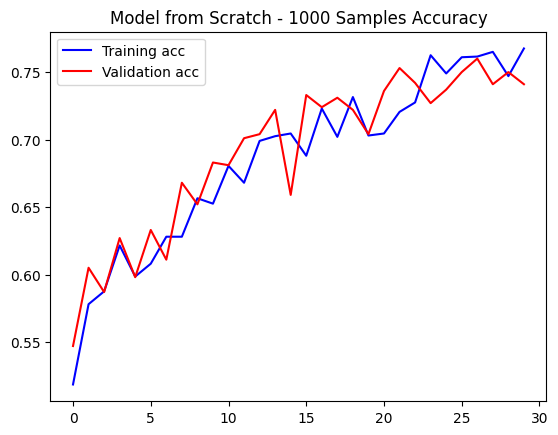

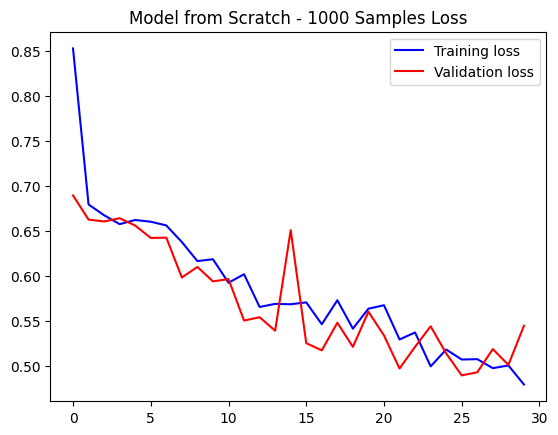

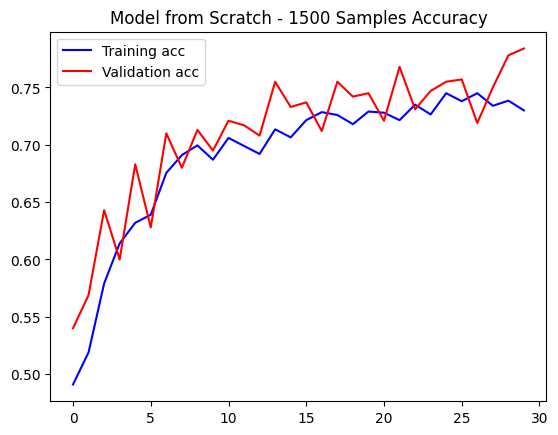

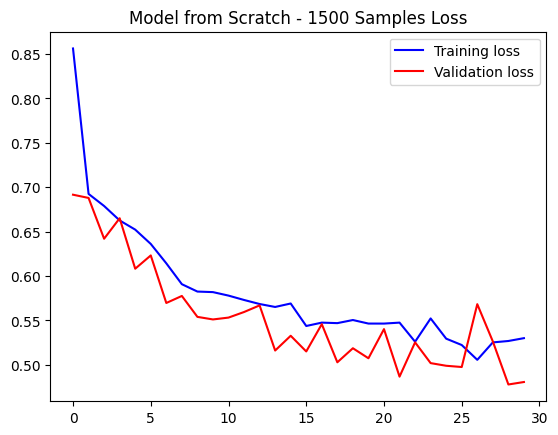

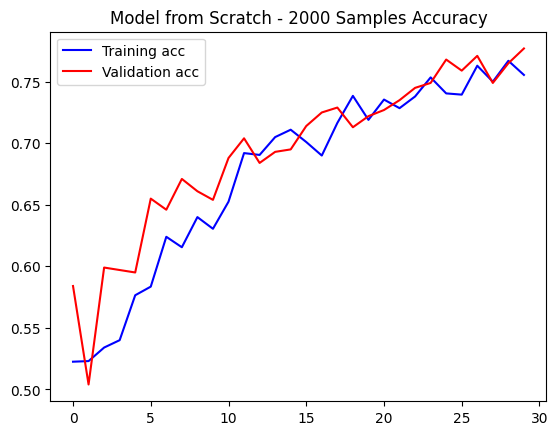

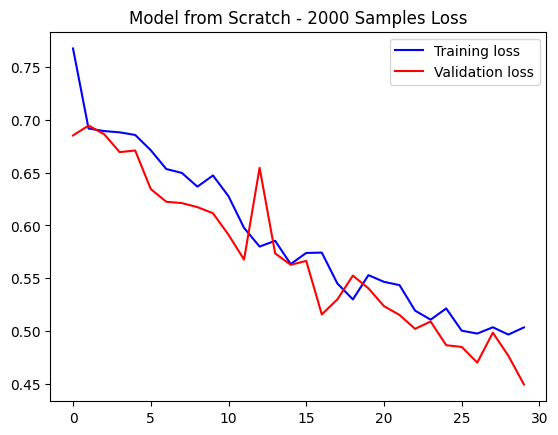

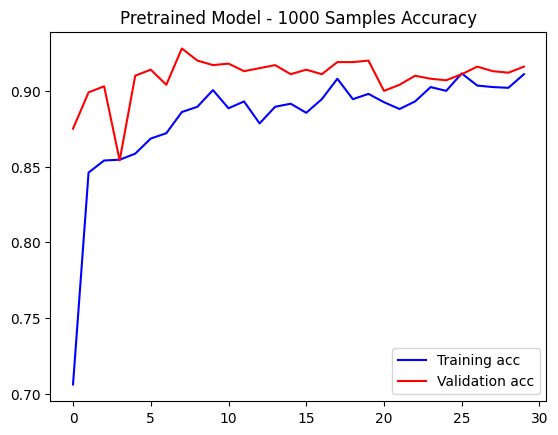

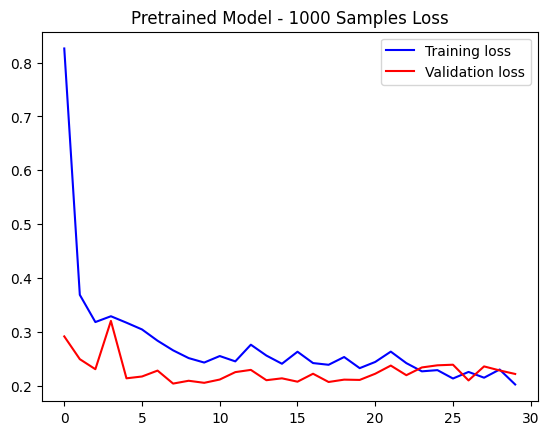

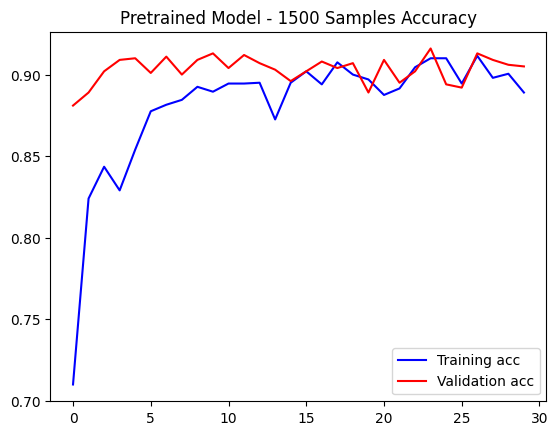

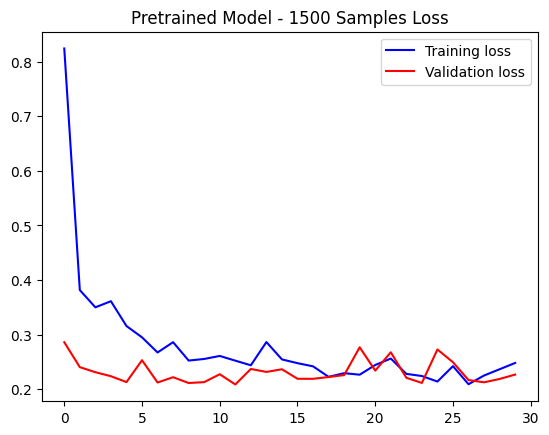

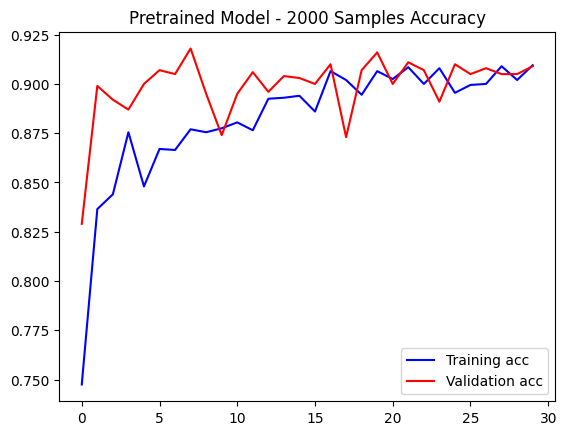

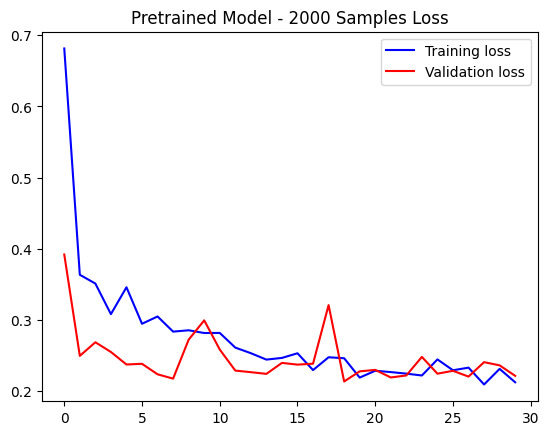

In [34]:
# Plotting performance for each cnn_classifier_model
visualize_performance(training_log_A, 'Model from Scratch - 1000 Samples')
visualize_performance(training_log_B, 'Model from Scratch - 1500 Samples')
visualize_performance(training_log_C, 'Model from Scratch - 2000 Samples')
visualize_performance(training_log_P1, 'Pretrained Model - 1000 Samples')
visualize_performance(training_log_P2, 'Pretrained Model - 1500 Samples')
visualize_performance(training_log_P3, 'Pretrained Model - 2000 Samples')

In [37]:
# Function to summarize final results
def aggregate_results(all_histories, classifier_model_image_labels):
    summary = {}
    for i, training_log in enumerate(all_histories):
        final_train_acc = training_log.history['accuracy'][-1] # Access history directly
        final_val_acc = training_log.history['val_accuracy'][-1] # Access history directly
        final_train_train_loss = training_log.history['loss'][-1] # Access history directly
        final_validation_train_loss = training_log.history['val_loss'][-1] # Access history directly
        summary[classifier_model_image_labels[i]] = {
            'Final Training Accuracy': final_train_acc,
            'Final Validation Accuracy': final_val_acc,
            'Final Training Loss': final_train_train_loss,
            'Final Validation Loss': final_validation_train_loss,
        }
    return summary

# Example of using the aggregate_results function
all_histories = [training_log_A, training_log_B, training_log_C,
             training_log_P1, training_log_P2, training_log_P3]
classifier_model_image_labels = [
    'Model from Scratch - 1000 Samples',
    'Model from Scratch - 1500 Samples',
    'Model from Scratch - 2000 Samples',
  'Pretrained Model - 1000 Samples',
    'Pretrained Model - 1500 Samples',
    'Pretrained Model - 2000 Samples'
]

# Get the summary of final values
final_scores = aggregate_results(all_histories, classifier_model_image_labels) # Call the function to get the summary

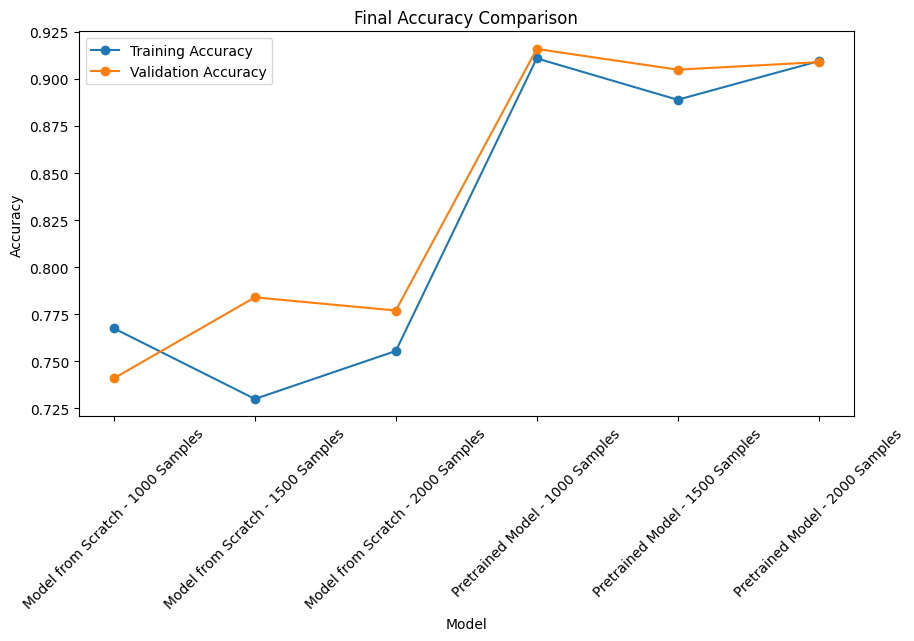

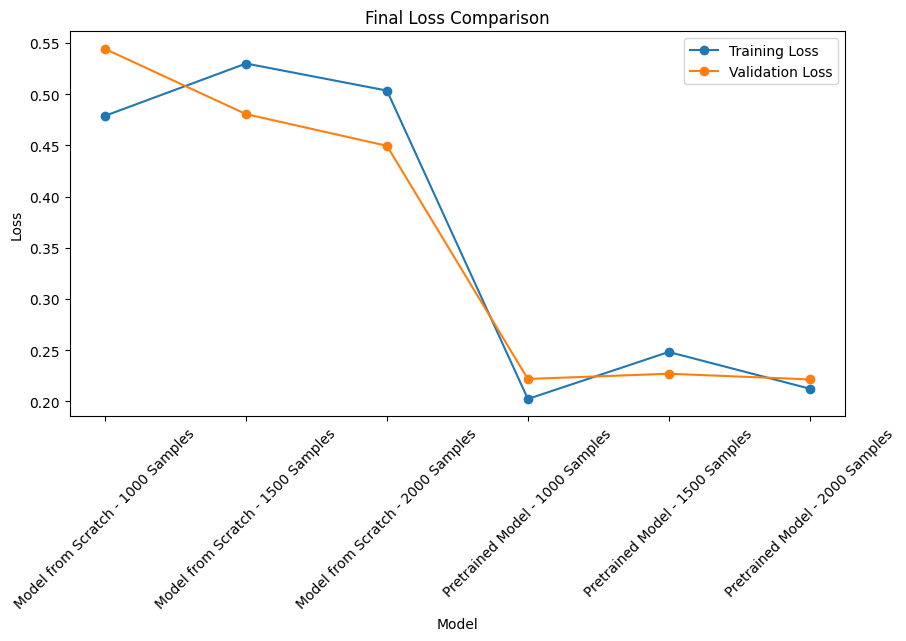

In [45]:
def compare_classifier_models(final_scores):
    classifier_model_image_labels = list(final_scores.keys())
    train_acc = [final_scores[image_label]['Final Training Accuracy'] for image_label in classifier_model_image_labels]
    val_acc = [final_scores[image_label]['Final Validation Accuracy'] for image_label in classifier_model_image_labels]
    train_train_loss = [final_scores[image_label]['Final Training Loss'] for image_label in classifier_model_image_labels]
    validation_train_loss = [final_scores[image_label]['Final Validation Loss'] for image_label in classifier_model_image_labels]

    # Accuracy comparison plot
    plotlib.figure(figsize=(10, 5))
    # Changed 'image_label' to 'label'
    plotlib.plot(classifier_model_image_labels, train_acc, label='Training Accuracy', marker='o')
    # Changed 'image_label' to 'label'
    plotlib.plot(classifier_model_image_labels, val_acc, label='Validation Accuracy', marker='o')
    plotlib.xticks(rotation=45)
    plotlib.title('Final Accuracy Comparison')
    plotlib.xlabel('Model')  # Changed 'ximage_label' to 'xlabel'
    plotlib.ylabel('Accuracy')  # Changed 'yimage_label' to 'ylabel'
    plotlib.legend()
    plotlib.show()

    # Loss comparison plot
    plotlib.figure(figsize=(10, 5))
    # Changed 'image_label' to 'label'
    plotlib.plot(classifier_model_image_labels, train_train_loss, label='Training Loss', marker='o')
    # Changed 'image_label' to 'label'
    plotlib.plot(classifier_model_image_labels, validation_train_loss, label='Validation Loss', marker='o')
    plotlib.xticks(rotation=45)
    plotlib.title('Final Loss Comparison')
    plotlib.xlabel('Model')  # Changed 'ximage_label' to 'xlabel'
    plotlib.ylabel('Loss')  # Changed 'yimage_label' to 'ylabel'
    plotlib.legend()
    plotlib.show()

    # Plot the comparisons
compare_classifier_models(final_scores)